# Preparing the Dataset

This chicken farm dataset is retrive from kaggle

In [0]:
!pip install -q kaggle

In [0]:
!mkdir ~/.kaggle

In [3]:
from google.colab import files
output = files.upload() #kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d phuzoman/egg-producing-chickens

  0% 0.00/5.90k [00:00<?, ?B/s]
100% 5.90k/5.90k [00:00<00:00, 10.5MB/s]


In [0]:
import zipfile

zip_ref = zipfile.ZipFile('egg-producing-chickens.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('GallusGallusDomesticus.csv')
df.sample(10)

,GallusID,GallusBreed,Day,Age,GallusWeight,GallusEggColor,GallusEggWeight,AmountOfFeed,EggsPerDay,GallusCombType,SunLightExposure,GallusClass,GallusLegShanksColor,GallusBeakColor,GallusEarLobesColor,GallusPlumage
460,Marans93,Marans,1,939,1600,Brown,40.03,117,1,Single,8,Continental,White,White,NaN,Splash
132,Marans27,Marans,3,179,1580,Brown,36.31,126,1,Single,9,Continental,White,White,NaN,Blue Copper
804,Marans161,Marans,5,161,1840,Brown,50.72,117,1,Single,7,Continental,White,White,NaN,Blue Copper
431,Marans87,Marans,2,102,2320,Brown,54.47,107,1,Single,8,Continental,White,White,NaN,Splash Copper
57,Marans12,Marans,3,725,2400,Brown,30.34,105,1,Single,8,Continental,White,White,NaN,Blue
910,Ameraucana2,Ameraucana,6,727,2140,Bluish-Green,44.82,117,1,Pea,11,NaN,Slate Black,White,Red,Blue Wheaten
122,Marans25,Marans,3,425,2410,Brown,45.24,129,1,Single,9,Continental,White,White,NaN,Splash
90,Marans19,Marans,1,442,1740,Brown,48.75,118,1,Single,7,Continental,White,White,NaN,Splash Copper
702,Marans141,Marans,3,964,1680,Brown,37.15,128,0,Single,7,Continental,White,White,NaN,Splash
877,Marans176,Marans,3,858,1530,Brown,54.98,128,1,Single,9,Continental,White,White,NaN,Splash


# Explore Metadata of the Dataset

In [9]:
df.shape

(1000, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GallusID              1000 non-null   object 
 1   GallusBreed           1000 non-null   object 
 2   Day                   1000 non-null   int64  
 3   Age                   1000 non-null   int64  
 4   GallusWeight          1000 non-null   int64  
 5   GallusEggColor        1000 non-null   object 
 6   GallusEggWeight       1000 non-null   float64
 7   AmountOfFeed          1000 non-null   int64  
 8   EggsPerDay            1000 non-null   int64  
 9   GallusCombType        1000 non-null   object 
 10  SunLightExposure      1000 non-null   int64  
 11  GallusClass           895 non-null    object 
 12  GallusLegShanksColor  970 non-null    object 
 13  GallusBeakColor       970 non-null    object 
 14  GallusEarLobesColor   85 non-null     object 
 15  GallusPlumage         

Here we have 7 numerical values, they are Day, Age, GallusWeight, GallusEggWeight, AmountOfFeed, EggsPerDay and SunLightExposure

In [11]:
df.isna().sum()

GallusID                  0
GallusBreed               0
Day                       0
Age                       0
GallusWeight              0
GallusEggColor            0
GallusEggWeight           0
AmountOfFeed              0
EggsPerDay                0
GallusCombType            0
SunLightExposure          0
GallusClass             105
GallusLegShanksColor     30
GallusBeakColor          30
GallusEarLobesColor     915
GallusPlumage             0
dtype: int64

All NaN is on categorical columns. As we see, less than 10% of GallusEarLobesColor is NaN. We can reject this column because of not sufficient enough to analyze compare to the percentage of other categorical columns. Those three remaining categorical columns can be neglected for a moment, but we will consider them in the next discussion (if possible).

In [13]:
df.columns

Index(['GallusID', 'GallusBreed', 'Day', 'Age', 'GallusWeight',
       'GallusEggColor', 'GallusEggWeight', 'AmountOfFeed', 'EggsPerDay',
       'GallusCombType', 'SunLightExposure', 'GallusClass',
       'GallusLegShanksColor', 'GallusBeakColor', 'GallusEarLobesColor',
       'GallusPlumage'],
      dtype='object')

### Columns Info
1.   GallusBreed - breed of chicken such as ‘Buff Orpington chicken’
2.   Day - an integer indicating the day on which an observation was made
3.   Age - age of the chicken in weeks
4. GallusWeight - weight of the chicken in grams
5. GallusEggColor - color of the eggs
6. GallusEggWeight - weight of the eggs in grams
7. AmountOfFeed - amount of feed in grams the chicken consumed per day
8. EggsPerDay - number of eggs a chicken laid on a particular day
9. GallusCombType - comb type of a particular chicken
10. SunLightExposure - number of hours a chicken is exposed to natural light (sunlight) in a day
11. GallusClass - chicken classes as classified by international Poultry 12. associations
12. GallusLegShanksColor - color of the legs/feet and shanks on them
13. GallusBeakColor - color of the chicken’s beak
14. GallusEarLobesColor - color of the chicken earlobes
15. GallusPlumage - color of the feathers


# Data Preprocessing

In [14]:
df.tail(15)

,GallusID,GallusBreed,Day,Age,GallusWeight,GallusEggColor,GallusEggWeight,AmountOfFeed,EggsPerDay,GallusCombType,SunLightExposure,GallusClass,GallusLegShanksColor,GallusBeakColor,GallusEarLobesColor,GallusPlumage
985,Ameraucana10,Ameraucana,1,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
986,Ameraucana10,Ameraucana,2,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
987,Ameraucana10,Ameraucana,3,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
988,Ameraucana10,Ameraucana,4,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
989,Ameraucana10,Ameraucana,5,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
990,Ameraucana10,Ameraucana,6,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
991,Ameraucana10,Ameraucana,7,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
992,Ameraucana10,Ameraucana,8,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
993,Ameraucana10,Ameraucana,9,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff
994,Ameraucana10,Ameraucana,10,901,2100,Light Blue,52.24,109,1,Pea,7,NaN,Slate Blue,White,Red,Buff


As we can see in the above table, for the same GallusID, we can easily notice the erroneous in column "Age". From the definition, the unit of "Age" is in a week. If we look the column "Day" which is the measurement day, there are the days of measurement that more than a week. As we know one week is equal to seven days, the age of chicken must be increased at least by one week.

By using this insight, we have to cut off some days of measurement. Because the minimum of number of available measurement in the data is five days, the measurement after fifth day should be neglected to make sure we still have the correct age for the chicken.

In [15]:
colOfInterest = ["GallusID", "GallusBreed", "Day", "GallusEggColor", 
                 "GallusCombType", "GallusPlumage"]
#uniqueItem = [df.loc[:, (col)].unique() for col in colOfInterest]
#print("GallusBreed:", df.loc[:, ('GallusBreed')].unique())
#print("Day of Measurement:", df.loc[:, ('Day')].unique())

for col in colOfInterest:
  print("{:s}".format(col), df.loc[:, (col)].unique())

GallusID ['Marans1' 'Marans2' 'Marans3' 'Marans4' 'Marans5' 'Marans6' 'Marans7'
 'Marans8' 'Marans9' 'Marans10' 'Marans11' 'Marans12' 'Marans13'
 'Marans14' 'Marans15' 'Marans16' 'Marans17' 'Marans18' 'Marans19'
 'Marans20' 'Marans21' 'Marans22' 'Marans23' 'Marans24' 'Marans25'
 'Marans26' 'Marans27' 'Marans28' 'Marans29' 'Marans30' 'Marans31'
 'Marans32' 'Marans33' 'Marans34' 'Marans35' 'Marans36' 'Marans37'
 'Marans38' 'Marans39' 'Marans40' 'Marans41' 'Marans42' 'Marans43'
 'Marans44' 'Marans45' 'Marans46' 'Marans47' 'Marans48' 'Marans49'
 'Marans50' 'Marans51' 'Marans52' 'Marans53' 'Marans54' 'Marans55'
 'Marans56' 'Marans57' 'Marans58' 'Marans59' 'Marans60' 'Marans61'
 'Marans62' 'Marans63' 'Marans64' 'Marans65' 'Marans66' 'Marans67'
 'Marans68' 'Marans69' 'Marans70' 'Marans71' 'Marans72' 'Marans73'
 'Marans74' 'Marans75' 'Marans76' 'Marans77' 'Marans78' 'Marans79'
 'Marans80' 'Marans81' 'Marans82' 'Marans83' 'Marans84' 'Marans85'
 'Marans86' 'Marans87' 'Marans88' 'Marans89' 'Maran

We drop the four columns that contain NaN for simplicity.


In [16]:
dfFiveDays = df[df.loc[:, ("Day")] <= 5].drop(["GallusClass",
                                               "GallusLegShanksColor", "GallusBeakColor",
                                               "GallusEarLobesColor"], axis=1)
dfFiveDays.head(10)

,GallusID,GallusBreed,Day,Age,GallusWeight,GallusEggColor,GallusEggWeight,AmountOfFeed,EggsPerDay,GallusCombType,SunLightExposure,GallusPlumage
0,Marans1,Marans,1,883,3000,Brown,41.19,114,1,Single,7,Blue Copper
1,Marans1,Marans,2,883,3000,Brown,41.19,114,1,Single,7,Blue Copper
2,Marans1,Marans,3,883,3000,Brown,41.19,114,1,Single,7,Blue Copper
3,Marans1,Marans,4,883,3000,Brown,41.19,114,1,Single,7,Blue Copper
4,Marans1,Marans,5,883,3000,Brown,41.19,114,1,Single,7,Blue Copper
5,Marans2,Marans,1,684,1750,Brown,52.91,111,1,Single,9,Blue
6,Marans2,Marans,2,684,1750,Brown,52.91,111,1,Single,9,Blue
7,Marans2,Marans,3,684,1750,Brown,52.91,111,1,Single,9,Blue
8,Marans2,Marans,4,684,1750,Brown,52.91,111,1,Single,9,Blue
9,Marans2,Marans,5,684,1750,Brown,52.91,111,1,Single,9,Blue


In [17]:
dfFiveDays.loc[dfFiveDays["EggsPerDay"] == 0, ("GallusID")].unique()

array(['Marans8', 'Marans43', 'Marans63', 'Marans112', 'Marans141',
       'Marans150', 'Marans172'], dtype=object)

Only Marans breedings that have zero eggs per day.

Checking all the columns if the have similar data within similar "GallusID". 

In [18]:
GallusIDUnique = dfFiveDays.loc[:, ("GallusID")].unique()

np.all(\
  np.array([dfFiveDays.drop(["Day"], axis=1)\
            [dfFiveDays["GallusID"] == GallusID]\
            .nunique().sum() for GallusID in GallusIDUnique]) == 11)

True

The above result shows "True". It means that for all items that have similar "GallusID", those items are similar each other within any columns.
This also means that in consecutive five days for the same Gallus ID, the "EggsPerDay" is either completely one or zero. This concludes that for specific "GallusID", there is a measurement of "EggsPerDay" doesn't represent correctly the Egg Laying Ratio. That is why the Egg Laying Ratio is either one or zero not in between one and zero.

This can be ovecomed by gaining longer period measurement (the entire lifespan of the chicken is the ideal way to do this).

Then we group the data by unique "GallusID", "GallusEggColor", "GallusCombType" and "GallusPlumage".

In [19]:
chickenData = dfFiveDays.drop(["Day"], axis=1)\
  .groupby(["GallusID", "GallusBreed", "GallusEggColor", "GallusCombType", 
            "GallusPlumage"], as_index=False).agg({
              "EggsPerDay": "sum",
              "Age": lambda x: x.head(1),
              "GallusWeight": lambda x: x.head(1),
              "GallusEggWeight": lambda x: x.head(1),
              "AmountOfFeed": lambda x: x.head(1),
              "SunLightExposure": lambda x: x.head(1)
            })\
  .sort_values(by=["GallusID"])

chickenData["EggLayingRatio"] = chickenData["EggsPerDay"] / 5.  # we have simplify only take 5 consecutive measurement as we have explained before.
chickenData = chickenData.drop(["EggsPerDay"], axis=1)
chickenData

,GallusID,GallusBreed,GallusEggColor,GallusCombType,GallusPlumage,Age,GallusWeight,GallusEggWeight,AmountOfFeed,SunLightExposure,EggLayingRatio
0,Ameraucana1,Ameraucana,Light Blue,Pea,Black,514,1740,47.12,114,6,1.0
1,Ameraucana10,Ameraucana,Light Blue,Pea,Buff,901,2100,52.24,109,7,1.0
2,Ameraucana11,Ameraucana,Bluish-Green,Pea,Blue Wheaten,384,1800,53.10,110,7,1.0
3,Ameraucana2,Ameraucana,Bluish-Green,Pea,Blue Wheaten,727,2140,44.82,117,11,1.0
4,Ameraucana3,Ameraucana,Bluish-Green,Pea,White,208,2080,49.51,113,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...
185,Marans95,Marans,Brown,Single,Blue,591,2980,34.30,116,7,1.0
186,Marans96,Marans,Brown,Single,Splash,589,1890,37.90,115,8,1.0
187,Marans97,Marans,Brown,Single,Blue Copper,72,2040,46.32,110,7,1.0
188,Marans98,Marans,Brown,Single,Blue Copper,393,1940,43.21,107,10,1.0


Splitting the breeding between Marans and Ameraucana.

In [0]:
chickenMarans = chickenData[chickenData["GallusBreed"] == "Marans"].sort_values(by=["Age"])
chickenAmeraucana = chickenData[chickenData["GallusBreed"] == "Ameraucana"].sort_values(by=["Age"])

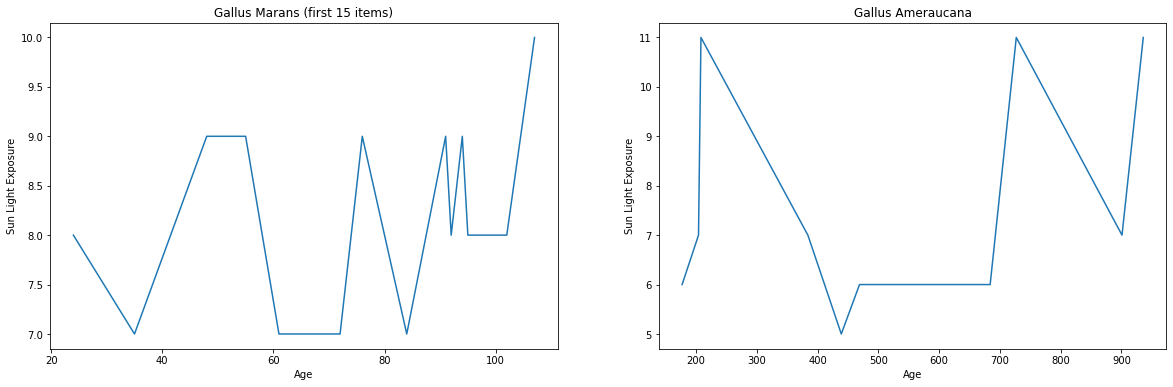

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
x, y = chickenMarans.groupby(["Age"], as_index=False).agg({
    "SunLightExposure": lambda x: x.head(1)
    }).to_numpy().transpose()
ax1.plot(x[:15], y[:15])      # you can set this in appropriate way as you need
ax1.set_xlabel("Age")
ax1.set_ylabel("Sun Light Exposure")
ax1.set_title("Gallus Marans (first 15 items)")

x, y = chickenAmeraucana.groupby(["Age"], as_index=False).agg({
    "SunLightExposure": lambda x: x.head(1)
    }).to_numpy().transpose()
ax2.plot(x, y)
ax2.set_xlabel("Age")
ax2.set_ylabel("Sun Light Exposure")
ax2.set_title("Gallus Ameraucana")

plt.show(fig)

If we look the both range of "Age" above, it seem some kind of impossibility in the age of the chicken. The average of chicken lifespan is from 5 - 10 years (260 - 521 weeks). See this [link](https://web.archive.org/web/20101128085141/http://ruleworks.co.uk/cgi-bin/TUfaq.exe?Guide=Poultry&Category=Poultry%20-%20General#q6). Even the oldest chicken (Old English Game breeding) in the world only has 16 years (834 weeks) lifespan. See this [link](https://www.tuscaloosanews.com/article/DA/20060806/News/606120381/TL).

From US FAO (see this [link](http://www.fao.org/3/y4628e/y4628e03.htm)), there is an optimum way how to deal with the sunlight exposure for general chicken breeding.
Most of the data doesn't have that pattern (change the age range to the appropriate range to see that sun light exposure pattern for reasonable range of ages).

But we can argue that different breeding has different pattern how to exposure chicken with the sunlight. This will be different discussion.

In [22]:
# To check that the grouping procedure is correct ------
print(len(chickenMarans))
print(len(chickenAmeraucana))
# -----------------------------------------------------

179
11


In [0]:
chickenMaransNumer = chickenMarans.select_dtypes(include=["float64", "int64"])
chickenAmeraucanaNumer = chickenAmeraucana.select_dtypes(include=["float64", "int64"])

# Explanatory Data Analysis

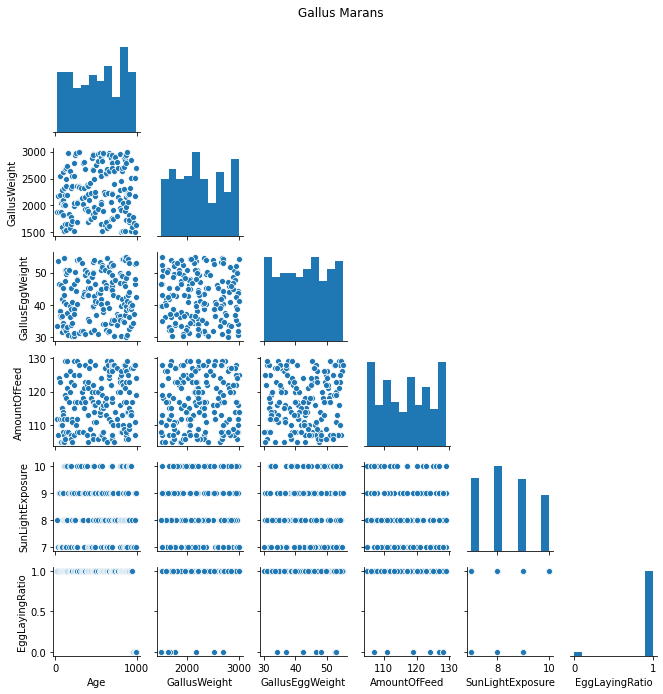

In [24]:
g = sns.pairplot(chickenMaransNumer, height=1.5, corner=True)
g.fig.suptitle("Gallus Marans", y=1.05); 

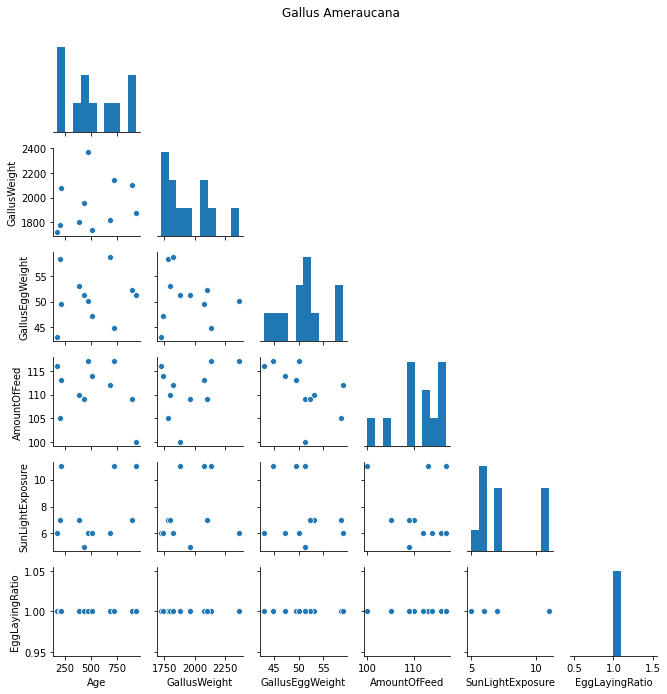

In [25]:
g = sns.pairplot(chickenAmeraucanaNumer, height=1.5, corner=True)
g.fig.suptitle("Gallus Ameraucana", y=1.05); 

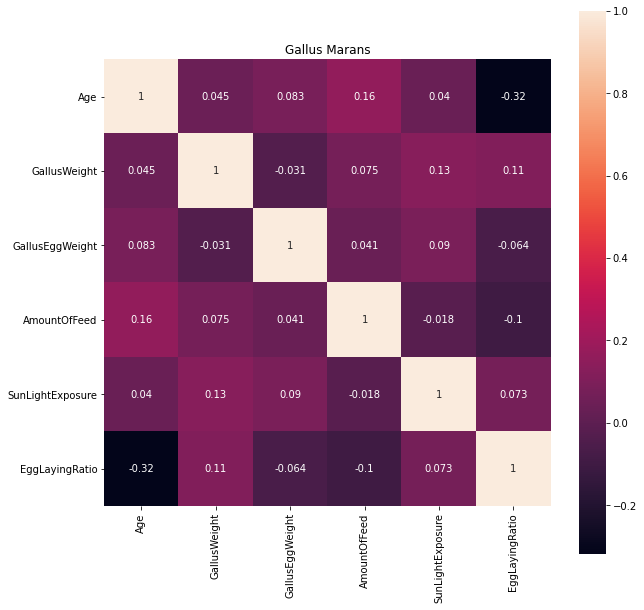

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(chickenMaransNumer.corr(), annot=True, square=True)
plt.title("Gallus Marans");

In [27]:
chickenMaransNumer.corr()['EggLayingRatio'].sort_values()

Age                -0.319618
AmountOfFeed       -0.099874
GallusEggWeight    -0.064371
SunLightExposure    0.072772
GallusWeight        0.112798
EggLayingRatio      1.000000
Name: EggLayingRatio, dtype: float64

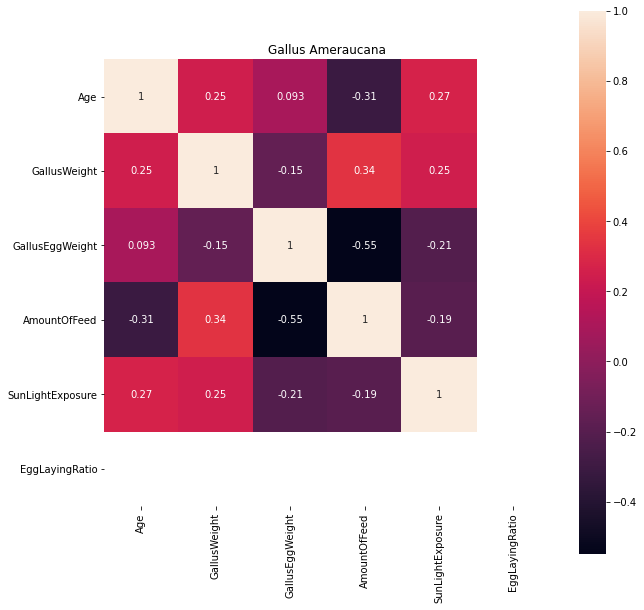

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(chickenAmeraucanaNumer.corr(), annot=True, square=True)
plt.title("Gallus Ameraucana");

In [29]:
chickenAmeraucanaNumer.corr()['EggLayingRatio'].sort_values()

Age                NaN
GallusWeight       NaN
GallusEggWeight    NaN
AmountOfFeed       NaN
SunLightExposure   NaN
EggLayingRatio     NaN
Name: EggLayingRatio, dtype: float64

We cannot draw any conclusion related to understand egg laying ratio for Gallus Ameraucana as we know all the correlation to "EggLayingRatio" is NaN. We need more data and to measure correctly what data that we need.

An interesting quick fact check in this data is the correlation between "AmountOfFeed" and "GallusWeight". This show intuitively correct that the more amount of feed that chicken have received, the more weight they gain.
If we look up to this [link](http://www.fao.org/3/y4628e/y4628e03.htm), we can know that there is an optimum weight for the chicken to maximize egg production. We can conclude that, when the chickens gain more weight, it will be hard for them to produce an egg. This fortells us that the amount of feed should be reduce when the chicken gain more weight.

In other hand, we can extract a few insights for Gallus Marans.

Several key takeaways in Gallus Marans dataset:
1. The older the chicken is, the lesser egg wiil be produced. As we can see in the general curve of egg laying ratio (Fig. 1), most of the "Age" data distributed around the downward phase of the curve (most of the data reside for the older ages). This exactly descirbes the correlation that we have computed.

2. Most our data reside in the older ages than the average ages of chicken. This will contribute a huge amount of irregularity to the correlation between four features ("AmountOfFee", "GallusWeight", "GallusEggWeight", "SunLightExposure") and egg laying ratio. All the four features have correlation to egg laying ratio closely enough to zero (abs(0.1)). These correlations show us that the features are almost random to the variation of "EggLayinggRatio" or doesn't follow linear relation.

In the below is the figure of general curve for flock production (in percentage) depends on the age of the flock of chickens. This flock production is somehow not so different term to egg laying ratio. (see this [link](http://www.fao.org/3/y4628e/y4628e03.htm) for the resouces).

**Figure 1**

![alt text](http://www.fao.org/3/y4628e/y4628e09.gif)

For final words, we need more **reliable** and **correctly measured** data.
In the next discussion, we try to find verified data from Poultry science journal and analysis it.